In [0]:
import pandas as pd

import numpy as np
from fbprophet import Prophet

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display

sample=pd.read_csv('https://raw.githubusercontent.com/anandwigma/Forecasting-Energy-Consumption-Using-Prophet/master/data/EKPC_hourly.csv')

In [5]:
print(sample.shape[0],'row','AND',sample.shape[1],'columns')
print('Min Date: ',sample.Datetime.min(),'AND','Max Date: ',sample.Datetime.max())
print('Min Energy Consumption: ',sample.EKPC_MW.min(),'AND','Max Energy Consumption: ',sample.EKPC_MW.max())
sample.head()

45334 row AND 2 columns
Min Date:  2013-06-01 01:00:00 AND Max Date:  2018-08-03 00:00:00
Min Energy Consumption:  514.0 AND Max Energy Consumption:  3490.0


,Datetime,EKPC_MW
0,2013-06-01 01:00:00,1166.0
1,2013-06-01 02:00:00,1098.0
2,2013-06-01 03:00:00,1036.0
3,2013-06-01 04:00:00,1023.0
4,2013-06-01 05:00:00,949.0


In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45334 entries, 0 to 45333
Data columns (total 2 columns):
Datetime    45334 non-null object
EKPC_MW     45334 non-null float64
dtypes: float64(1), object(1)
memory usage: 708.5+ KB


Text(0.5, 1.0, "Kentucky's Energy Consumption Hourly")

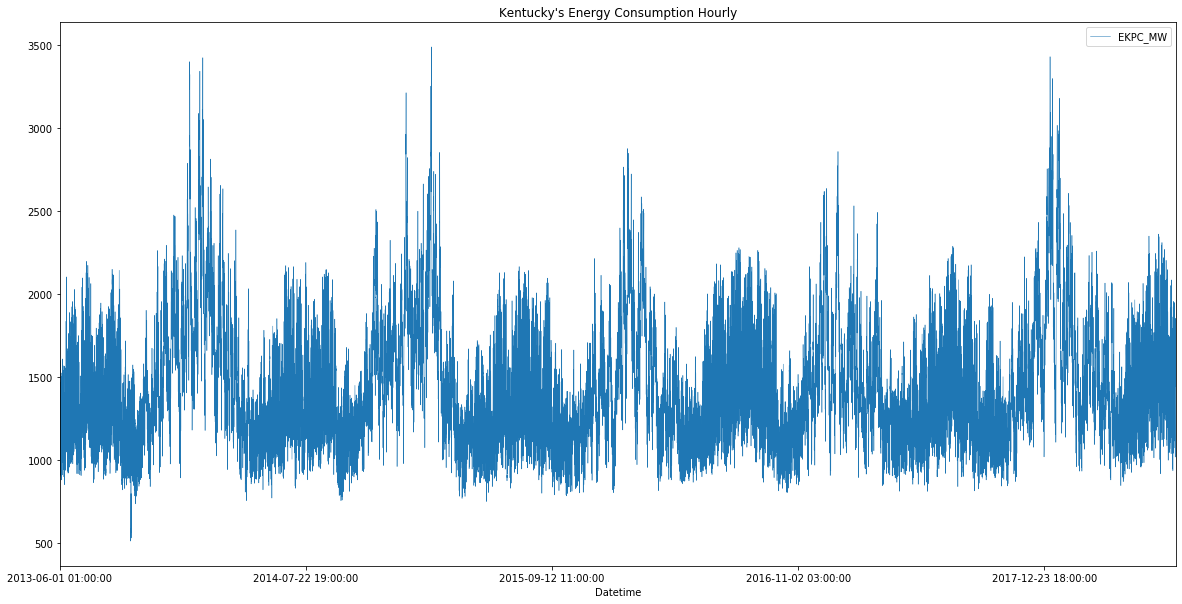

In [7]:
from matplotlib.pyplot import figure

sample.plot(x='Datetime',y='EKPC_MW',lw = 0.5,figsize=(20,10))
plt.title("Kentucky's Energy Consumption Hourly")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


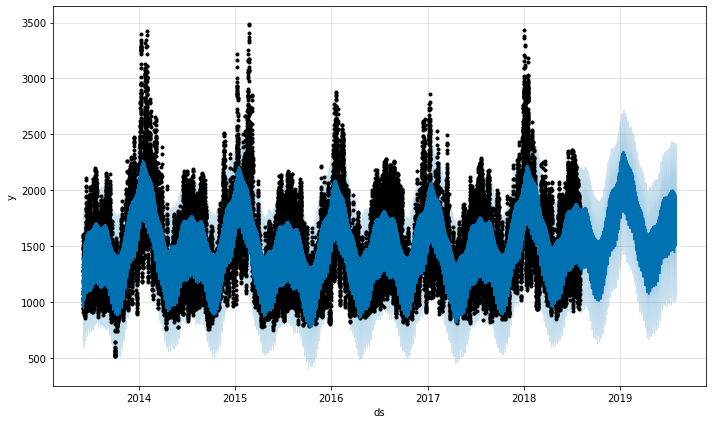

In [8]:
#Forecasting the yearly, weekly, daily, and trend
from fbprophet.plot import add_changepoints_to_plot

sample=pd.read_csv('https://raw.githubusercontent.com/anandwigma/Forecasting-Energy-Consumption-Using-Prophet/master/data/EKPC_hourly.csv')
sample.columns = ['ds','y']

m = Prophet(changepoint_prior_scale=0.01)
m.fit(sample)
future = m.make_future_dataframe(periods=8760, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

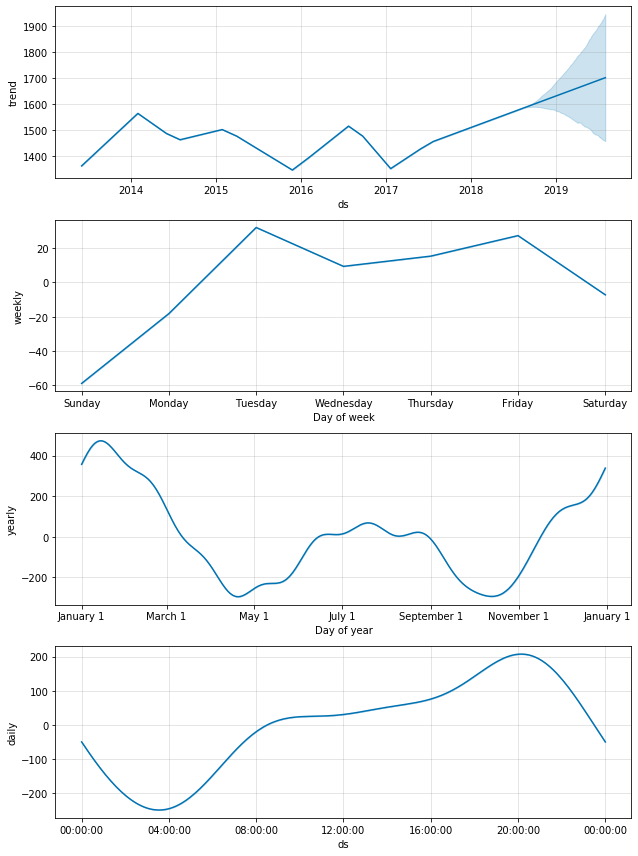

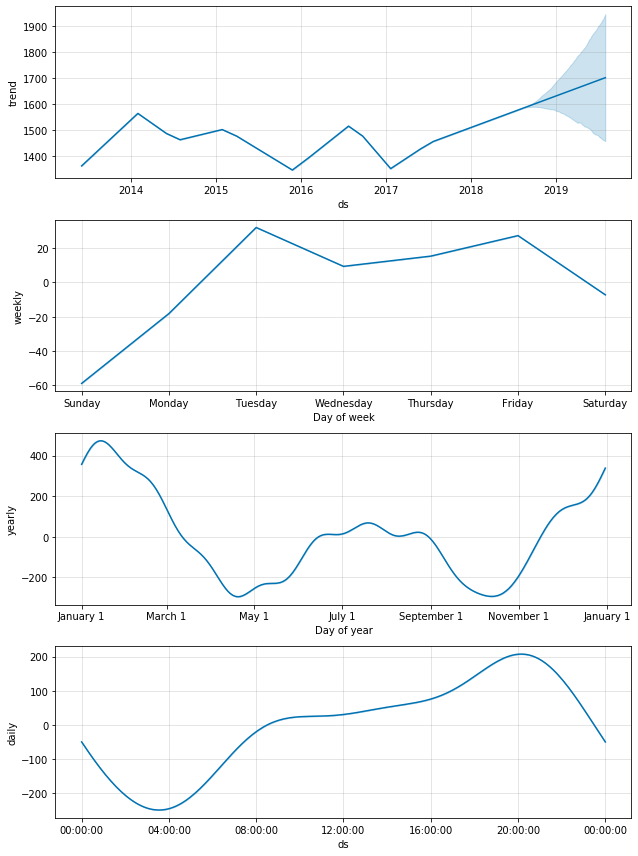

In [9]:
m.plot_components(fcst)

In [0]:
#Forecasting includes the season in Kentucky (Summer, Spring, Fall, and Winter)
sample=pd.read_csv('https://raw.githubusercontent.com/anandwigma/Forecasting-Energy-Consumption-Using-Prophet/master/data/EKPC_hourly.csv')
sample.columns = ['ds','y']

def is_spring(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 3 and date.month <= 5)

def is_summer(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 6 and date.month <= 8)

def is_fall(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 9 and date.month <= 11)

def is_winter(ds):
    date = pd.to_datetime(ds)
    return (date.month == 12 or date.month < 3)

sample['spring day'] = sample['ds'].apply(is_spring)
sample['summer day'] = sample['ds'].apply(is_summer)
sample['fall day'] = sample['ds'].apply(is_fall)
sample['winter day'] = sample['ds'].apply(is_winter)


In [0]:
from fbprophet.plot import add_changepoints_to_plot

m = Prophet(weekly_seasonality=False,changepoint_prior_scale=0.01)
m.add_country_holidays(country_name='US')
m.add_seasonality(name='Spring', period=7, fourier_order=3, condition_name='spring day')
m.add_seasonality(name='Summer', period=7, fourier_order=3, condition_name='summer day')
m.add_seasonality(name='Fall', period=7, fourier_order=3, condition_name='fall day')
m.add_seasonality(name='Winter', period=7, fourier_order=3, condition_name='winter day')
m.fit(sample)
future = m.make_future_dataframe(periods=8760, freq='H')
future['summer day'] = future['ds'].apply(is_summer)
future['spring day'] = future['ds'].apply(is_spring)
future['fall day'] = future['ds'].apply(is_fall)
future['winter day'] = future['ds'].apply(is_winter)
fcst = m.predict(future)

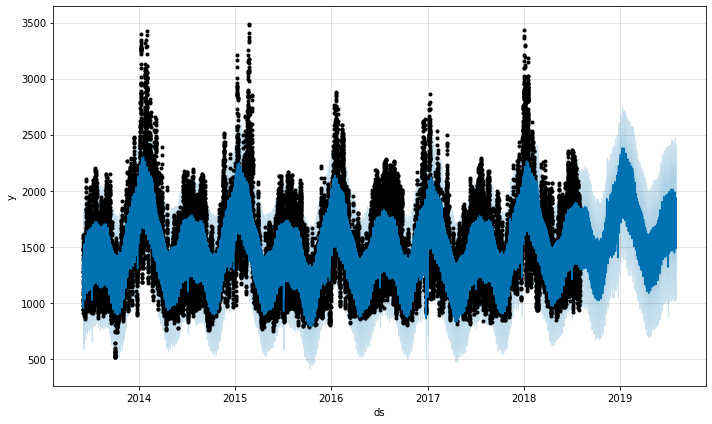

In [12]:
fig = m.plot(fcst)

In [13]:
m.train_holiday_names

0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

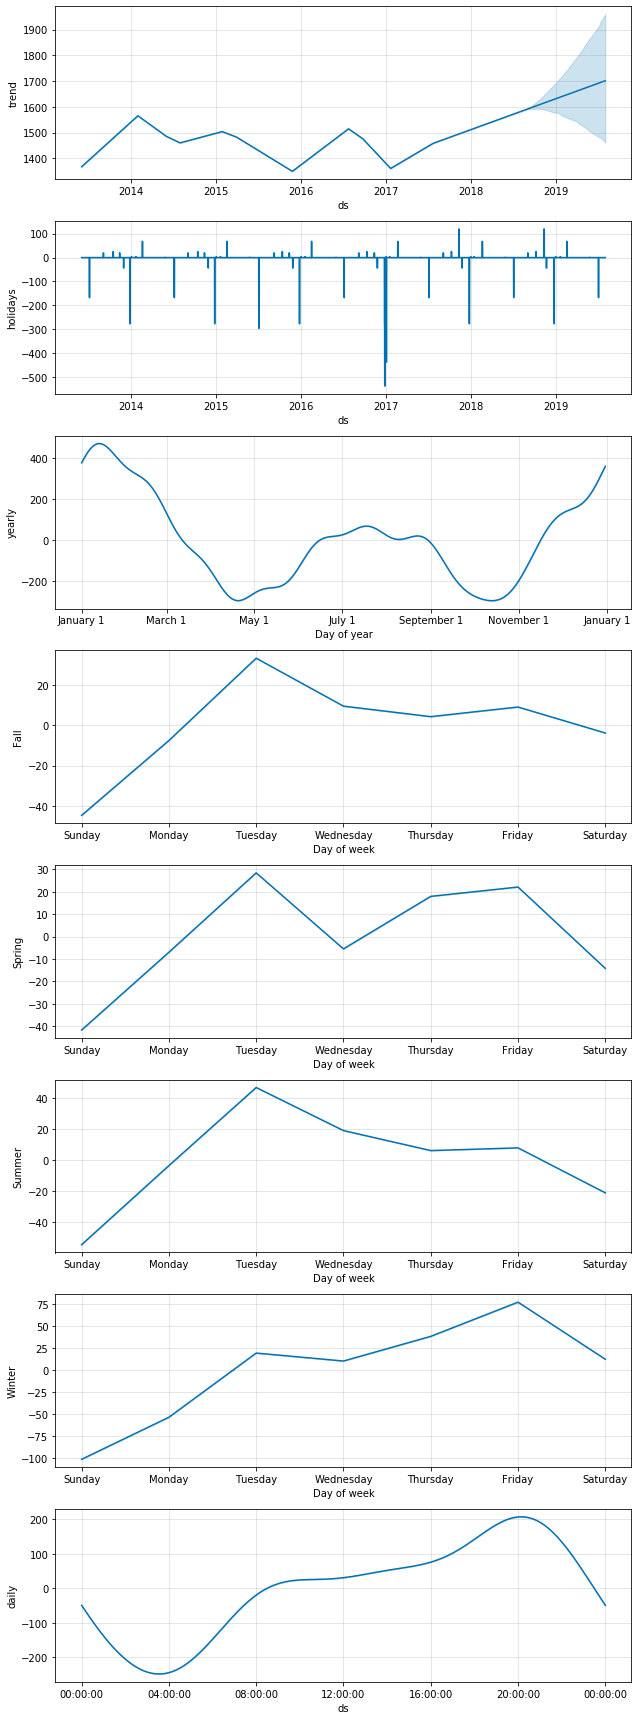

In [14]:
fig = m.plot_components(fcst)

In [17]:
population = pd.read_csv('https://raw.githubusercontent.com/anandwigma/Forecasting-Energy-Consumption-Using-Prophet/master/data/Kentucky%20Population.csv')
population = population.loc[113:]

sample=pd.read_csv('https://raw.githubusercontent.com/anandwigma/Forecasting-Energy-Consumption-Using-Prophet/master/data/EKPC_hourly.csv')
year_2013 = sample.loc[:5133]
year_2014 = sample.loc[5134:13893]
year_2015 = sample.loc[13894:22653]
year_2016 = sample.loc[22654:31437]
year_2017 = sample.loc[31438:40197]


mean_years = pd.DataFrame(
    {
        'Year' : ['2013','2014','2015','2016','2017'],
     
        'Energy Usage (MW)' : [year_2013['EKPC_MW'].mean(),
                               year_2014['EKPC_MW'].mean(),
                               year_2015['EKPC_MW'].mean(),
                               year_2016['EKPC_MW'].mean(),
                               year_2017['EKPC_MW'].mean()],
     
        'Population (million)' : [population['Kentucky(in million)'].iloc[0],
                                  population['Kentucky(in million)'].iloc[1],
                                  population['Kentucky(in million)'].iloc[2],
                                  population['Kentucky(in million)'].iloc[3],
                                  population['Kentucky(in million)'].iloc[4]],
        
        'Energy Usage/person (Watt/person)' : [year_2013['EKPC_MW'].mean()/population['Kentucky(in million)'].iloc[0],
                                        year_2014['EKPC_MW'].mean()/population['Kentucky(in million)'].iloc[1],
                                        year_2015['EKPC_MW'].mean()/population['Kentucky(in million)'].iloc[2],
                                        year_2016['EKPC_MW'].mean()/population['Kentucky(in million)'].iloc[3],
                                        year_2017['EKPC_MW'].mean()/population['Kentucky(in million)'].iloc[4]]
    }
)
mean_years


,Year,Energy Usage (MW),Population (million),Energy Usage/person (Watt/person)
0,2013,1414.277172,4.399121,321.490855
1,2014,1500.405479,4.410415,340.195986
2,2015,1423.415639,4.422057,321.889935
3,2016,1467.900501,4.436113,330.897906
4,2017,1428.601370,4.454189,320.732095


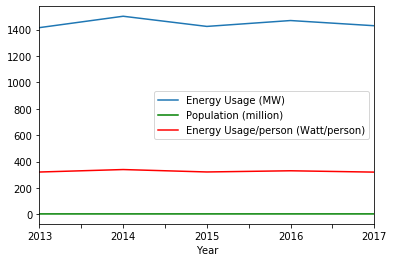

In [18]:
ax = plt.gca()

mean_years.plot(kind='line',x='Year',y='Energy Usage (MW)',ax=ax)
mean_years.plot(kind='line',x='Year',y='Population (million)', color='green', ax=ax)
mean_years.plot(kind='line',x='Year',y='Energy Usage/person (Watt/person)', color='red', ax=ax)

plt.show()
